In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Logistic-Regression/titanic_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


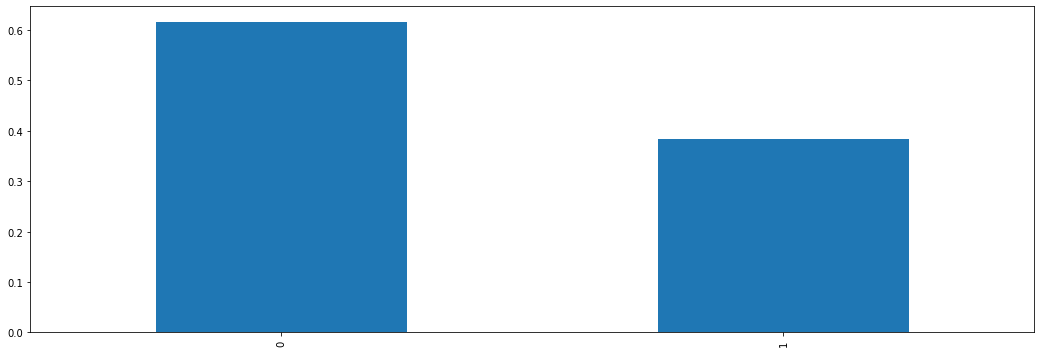

In [22]:
fig = plt.figure(figsize=(18,6))
df.Survived.value_counts(normalize=True).plot(kind='bar')
plt.show()

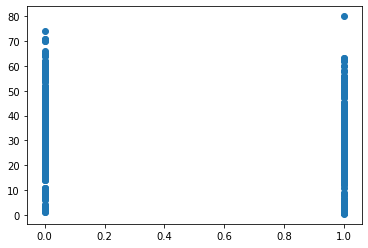

In [14]:
plt.scatter(df.Survived,df.Age)

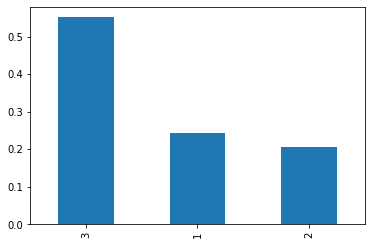

In [17]:
df.Pclass.value_counts(normalize = True).plot(kind='bar')

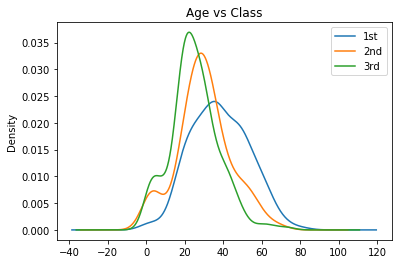

In [21]:
# THis plot shows the relation between how much money one earns with respect to age
# As we can observe that the 1st class people being Older while the 1st class passenger being younger
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Age vs Class')
plt.legend(('1st','2nd','3rd'))

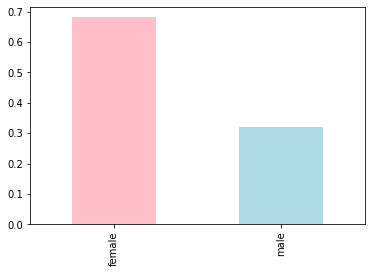

In [28]:
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind='bar',color =('pink','lightblue'))

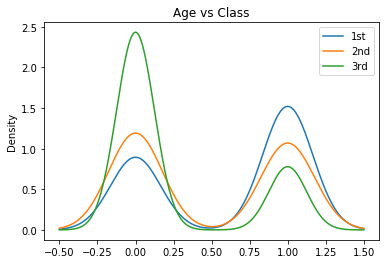

In [35]:
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Age vs Class')
plt.legend(('1st','2nd','3rd'))

In [51]:
# Before running our Algorithm I would like to verify a very simple Hypothesis 
# i.e If you are a male you die and if you are a female you survive,I know thta's pretty brutal but let's check out the reults

df['Hyp'] = 0
df.loc[df.Sex == 'female','Hyp'] = 1

df["result"] = 0

df.loc[df.Survived == df['Hyp'],'result'] =1 

print(df['result'].value_counts(normalize = True))

# As we can observe that our brutal hypothesis is 78% Accurate. Analyze the data before you start deploying the algorithms



1    0.786756
0    0.213244
Name: result, dtype: float64


In [55]:
# Clean the data

df ['Age']=df['Age'].fillna(df['Age'].dropna().median())

df['Fare']=df['Fare'].fillna(df['Fare'].dropna().median())

df['Embarked']=df['Embarked'].fillna('S')

In [57]:
df.loc[df.Embarked == 'S','Embarked']=0
df.loc[df.Embarked == 'C','Embarked']=1
df.loc[df.Embarked == 'Q','Embarked']=2

In [93]:
df.loc[df.Sex == 'male','Sex']=0
df.loc[df.Sex == 'female','Sex']=1


C:\Users\L\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [95]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
lr = LogisticRegression()

In [97]:
P = lr.fit(X,y)

C:\Users\L\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
P.score(X,y)

0.7991021324354658

In [108]:
poly = preprocessing.PolynomialFeatures(degree = 2)
poly_f = poly.fit_transform(X)
P = lr.fit(poly_f ,y)
print (P.score(poly_f,y))
# Pretty good ! This proved to be a better!

0.8361391694725028


C:\Users\L\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
